In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from telex import synth
import torch
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
torch.set_printoptions(sci_mode=False, precision=3)

train_0 = np.load('/hdd/FHWA_dataset/torch_dataset/train_3_x.npy')
train_1 = np.load('/hdd/FHWA_dataset/torch_dataset/train_5_x.npy')
train_2 = np.load('/hdd/FHWA_dataset/torch_dataset/train_6_x.npy')
train_3 = np.load('/hdd/FHWA_dataset/torch_dataset/train_7_x.npy')

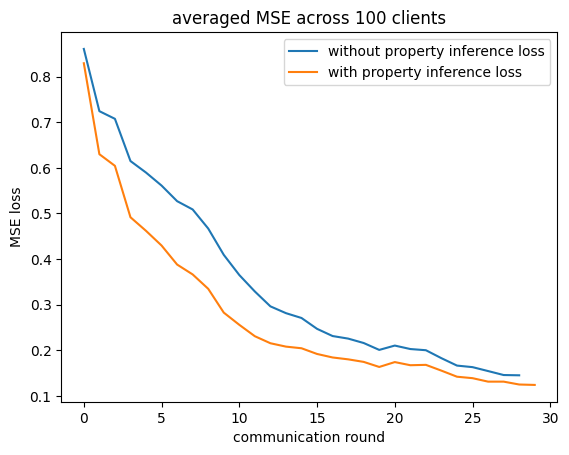

In [2]:
wo_prop = [0.8609, 0.7244, 0.7076, 0.6150, 0.5897, 0.5612, 0.5270, 
           0.5088, 0.4670, 0.4093, 0.3650, 0.3289, 0.2963, 0.2814, 
           0.2708, 0.2470, 0.2312, 0.2256, 
           0.2159, 0.2008, 0.2103, 0.2027, 0.2001, 
           0.1826, 0.1664, 0.1630, 0.1544, 0.1457, 0.1451]

w_prop = [
    0.8295, 0.6300, 0.6045, 0.4917, 0.4619, 0.4297, 0.3880,
    0.3663, 0.3348, 0.2826, 0.2558, 0.2308, 0.2154, 0.2080,
    0.2044, 0.1919, 0.1842, 0.1801, 0.1745, 0.1634, 0.1741,
    0.1672, 0.1680, 0.1553, 0.1420, 0.1388, 0.1312, 0.1312,
    0.1249, 0.1240
]

plt.plot(wo_prop, label='without property inference loss')
plt.plot(w_prop, label='with property inference loss')
plt.legend()
plt.xlabel('communication round')
plt.ylabel('MSE loss')
plt.title('averaged MSE across 100 clients')
plt.show()

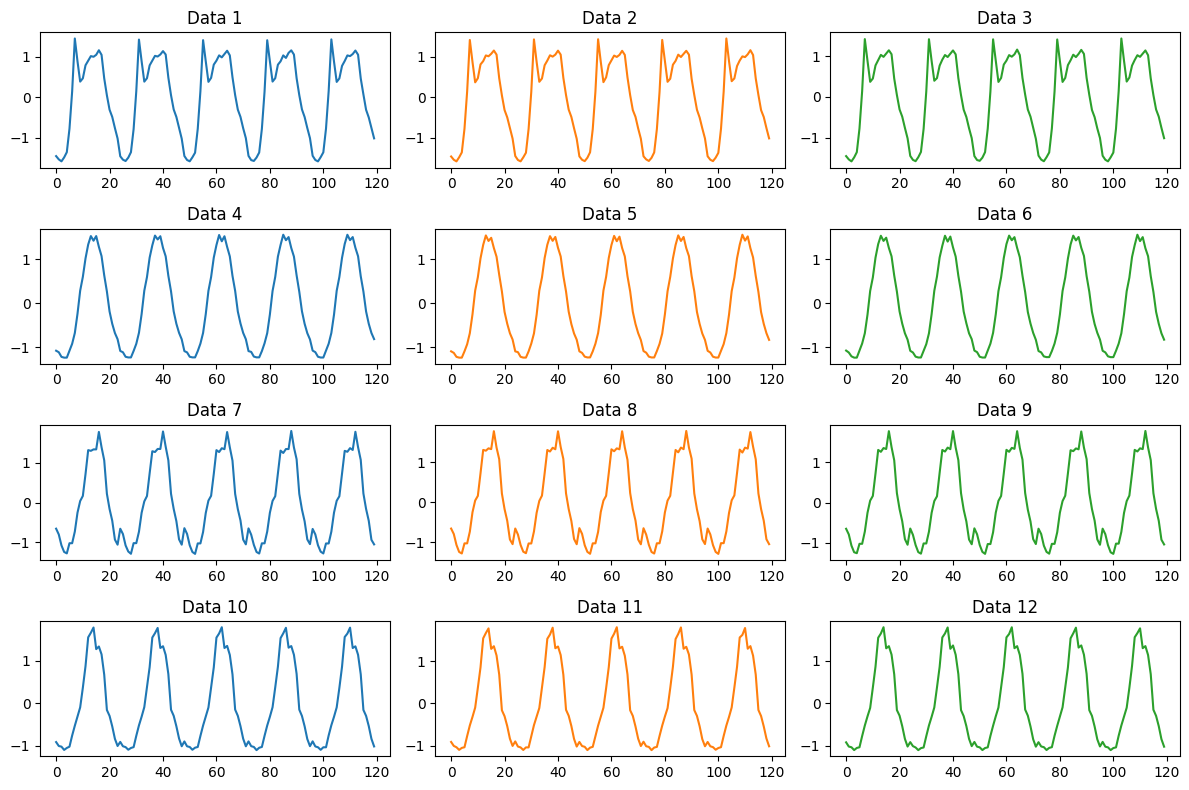

In [3]:
fig, axs = plt.subplots(4, 3, figsize=(12, 8))

axs[0, 0].plot(train_0[0], 'tab:blue')
axs[0, 0].set_title('Data 1')
axs[0, 1].plot(train_0[1], 'tab:orange')
axs[0, 1].set_title('Data 2')
axs[0, 2].plot(train_0[2], 'tab:green')
axs[0, 2].set_title('Data 3')
axs[1, 0].plot(train_1[0], 'tab:blue')
axs[1, 0].set_title('Data 4')
axs[1, 1].plot(train_1[1], 'tab:orange')
axs[1, 1].set_title('Data 5')
axs[1, 2].plot(train_1[2], 'tab:green')
axs[1, 2].set_title('Data 6')
axs[2, 0].plot(train_2[0], 'tab:blue')
axs[2, 0].set_title('Data 7')
axs[2, 1].plot(train_2[1], 'tab:orange')
axs[2, 1].set_title('Data 8')
axs[2, 2].plot(train_2[2], 'tab:green')
axs[2, 2].set_title('Data 9')
axs[3, 0].plot(train_3[0], 'tab:blue')
axs[3, 0].set_title('Data 10')
axs[3, 1].plot(train_3[1], 'tab:orange')
axs[3, 1].set_title('Data 11')
axs[3, 2].plot(train_3[2], 'tab:green')
axs[3, 2].set_title('Data 12')
plt.tight_layout()

In [4]:
STL_templates = {
    'always-eventually': 'G[0,95] F[0,23] (x>a? 0;500)',
    'eventually-always': 'F[0,95] G[0, a?0;23] (x>50)', 
    'eventually-always-or': 'F[0,95] (F[0,23]x>a? 0;500 | F[0,23]x<a? 0;50)',
    'eventually-eventually-always': 'F[0,95] (F[0,23] (x>50) & G[a?0;23, b?0;23] (x>50))',
    'implies': 'G[0,95] (x<500 -> F[0, a?0;23] (x>50))', 
}

In [12]:
def generate_property(trace, template):
    print('Got template:', template)
    optmethod = "gradient"
    (stlsyn, value, dur) = synth.synthSTLParam(template, trace, optmethod)
    return stlsyn, value, dur

print("Test 1: G F")
(stlsyn1, value1, dur) = generate_property(train_0[0], STL_templates['always-eventually'])
print("Mining result:", stlsyn1)

print("Test 2: F G")
(stlsyn2, value2, dur) = generate_property(train_0[0], STL_templates['eventually-always'])
print("Mining result:", stlsyn2)

print("Test 3: F G (p1 | p2)")
(stlsyn3, value3, dur) = generate_property(train_0[0], STL_templates['eventually-always-or'])
print("Mining result:", stlsyn3)

print("Test 4: F (F & G)")
(stlsyn4, value4, dur) = generate_property(train_0[0], STL_templates['eventually-eventually-always'])
print("Mining result:", stlsyn4)

print("Test 5: G (p1->p2)")
(stlsyn5, value5, dur) = generate_property(train_0[0], STL_templates['implies'])
print("Mining result:", stlsyn5)

Test 1: G F
Got template: G[0,95] F[0,23] (x>a? 0;500)
Mining result: G[0.0,95.0]F[0.0,23.0](x > 1.40380859375)
Test 2: F G
Got template: F[0,95] G[0, a?0;23] (x>50)


ValueError: Template F[0.0,95.0]G[0.0,a? 0.0;23.0 ](x > 50.0) could not be completed. Rerun to try again. Numerical optimization experienced convergence problems.

157.99713134765625


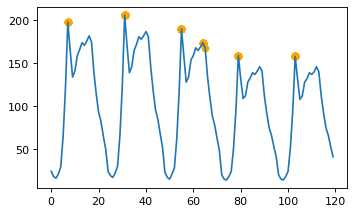

In [5]:
print(stlsyn1.subformula.subformula.bound)
figure(figsize=(5, 3), dpi=80)
plt.plot(train_0[0])
for i in range(0,96):
    index_max = train_0[0][i:i+24].argmax(axis=0)+i
    plt.scatter(index_max, train_0[0][index_max], c='orange')
    # print(index_max, train_0[0][0][index_max])
plt.show()


F[0.0,95.0]G[0.0,1.9958](x > 0.75)

[0.0,18.99857014587922]


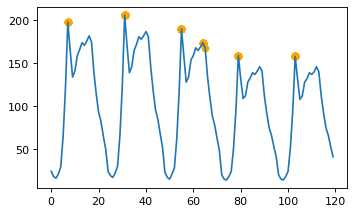

In [6]:
print(stlsyn2.subformula.interval)
figure(figsize=(5, 3), dpi=80)
plt.plot(train_0[0])
for i in range(0,96):
    index_max = train_0[0][i:i+24].argmax(axis=0)+i
    plt.scatter(index_max, train_0[0][index_max], c='orange')
plt.show()

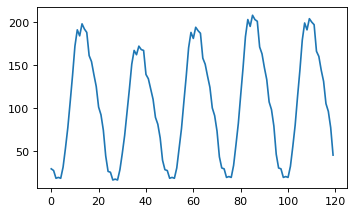

In [119]:
figure(figsize=(5, 3), dpi=80)
plt.plot(train_0[0])


In [120]:
test1 = 'G[0,95] F[0,23] (x>a? 0;500)'
print(test1)
(stlsyn1, value1, dur) = generate_property(train_0[0], STL_templates['always-eventually'])
print("Mining result:", stlsyn1)

G[0,95] F[0,23] (x>a? 0;500)
Got template: G[0,95] F[0,23] (x>a? 0;500)
Mining result: G[0.0,95.0]F[0.0,23.0](x > 171.9970703125)


In [121]:
train_0[0]

array([ 29,  27,  18,  19,  18,  31,  53,  77, 107, 138, 172, 191, 184,
       198, 192, 188, 161, 154, 139, 125, 101,  92,  74,  44,  26,  25,
        16,  17,  16,  28,  47,  68,  95, 122, 151, 167, 162, 172, 168,
       167, 139, 134, 122, 110,  89,  81,  65,  39,  28,  27,  18,  19,
        18,  30,  53,  76, 107, 137, 170, 188, 181, 194, 190, 187, 158,
       151, 137, 124, 100,  91,  73,  43,  30,  29,  19,  20,  19,  33,
        57,  82, 115, 147, 183, 203, 195, 208, 203, 201, 171, 163, 147,
       133, 107,  98,  79,  46,  30,  29,  19,  20,  19,  32,  55,  80,
       113, 144, 179, 199, 191, 204, 200, 197, 166, 160, 144, 131, 105,
        96,  77,  45])